# HONIR ImPol UP 2023 with aperture centering
2023/10/17 H. Akitaya (PERC/CIT)

In [1]:
import os
import sys
import glob

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits
from astropy.table import Table

In [2]:
import tmp_photo as tp

In [3]:
cd honir_impol/

/mnt/data5/users/akitaya/honir_impol


In [4]:
date_strs = glob.glob('2023????')
date_strs.sort()

In [5]:
print(date_strs)

['20230116', '20230130', '20230201', '20230204', '20230224', '20230228', '20230402', '20230421', '20230806', '20230821', '20230822', '20230826', '20231002']


In [6]:
fns_fl_tmp = glob.glob(os.path.join(date_strs[0], '*_fl.fits'))
fns_fl_tmp.sort()

In [7]:
print(fns_fl_tmp)

['20230116/HN0325056opt00.bs_bs_fl.fits', '20230116/HN0325057opt00.bs_bs_fl.fits', '20230116/HN0325058opt00.bs_bs_fl.fits', '20230116/HN0325059opt00.bs_bs_fl.fits', '20230116/HN0325060opt00.bs_bs_fl.fits', '20230116/HN0325061opt00.bs_bs_fl.fits', '20230116/HN0325062opt00.bs_bs_fl.fits', '20230116/HN0325063opt00.bs_bs_fl.fits', '20230116/HN0325064opt00.bs_bs_fl.fits', '20230116/HN0325065opt00.bs_bs_fl.fits', '20230116/HN0325066opt00.bs_bs_fl.fits', '20230116/HN0325067opt00.bs_bs_fl.fits']


In [8]:
from photutils.aperture import CircularAnnulus, CircularAperture
from photutils.aperture import ApertureStats
from photutils.aperture import aperture_photometry
from astropy.stats import SigmaClip

In [9]:
coords = ((902, 1004), (1067, 1004))

In [10]:
with fits.open(fns_fl_tmp[0]) as hdul:
    tbl_tmp = tp.apphot_pol_oe(hdul, coords)

In [11]:
from astropy.table import vstack

In [12]:
tbls = []
for fn in fns_fl_tmp:
    with fits.open(fn) as hdul:
        print(fn)  # Debug.
        tbls.append(tp.apphot_pol_oe(hdul, coords, r_ap=12, r_in=15, r_out=18))
tbl_all = vstack(tbls)

20230116/HN0325056opt00.bs_bs_fl.fits
20230116/HN0325057opt00.bs_bs_fl.fits
20230116/HN0325058opt00.bs_bs_fl.fits
20230116/HN0325059opt00.bs_bs_fl.fits
20230116/HN0325060opt00.bs_bs_fl.fits
20230116/HN0325061opt00.bs_bs_fl.fits
20230116/HN0325062opt00.bs_bs_fl.fits
20230116/HN0325063opt00.bs_bs_fl.fits
20230116/HN0325064opt00.bs_bs_fl.fits
20230116/HN0325065opt00.bs_bs_fl.fits
20230116/HN0325066opt00.bs_bs_fl.fits
20230116/HN0325067opt00.bs_bs_fl.fits


In [13]:
tbl_tmp

<QTable length=2>
  id      xcentroid          ycentroid      ...    filename    band   hwp  
                                            ...                            
int64      float64            float64       ...     str14      str1 float64
----- ------------------ ------------------ ... -------------- ---- -------
    1  902.1269777780237 1000.3600860555612 ... HN0325056opt00    R     0.0
    2 1063.5563919571075  1001.350245815777 ... HN0325056opt00    R     0.0

In [14]:
tbl_all

<QTable length=24>
  id      xcentroid          ycentroid      ...    filename    band   hwp  
                                            ...                            
int64      float64            float64       ...     str14      str1 float64
----- ------------------ ------------------ ... -------------- ---- -------
    1  902.1269777780237 1000.3600860555612 ... HN0325056opt00    R     0.0
    2 1063.5563919571075  1001.350245815777 ... HN0325056opt00    R     0.0
    1  902.8489185015051  999.9957043440222 ... HN0325057opt00    R    45.0
    2 1064.3857912259616 1000.9121379861548 ... HN0325057opt00    R    45.0
    1  902.3538098527284 1000.9950111499402 ... HN0325058opt00    R    22.5
    2 1063.9080857161105 1002.0686165744921 ... HN0325058opt00    R    22.5
    1  902.2803595066437 1001.4863448465494 ... HN0325059opt00    R    67.5
    2 1063.9160507479924 1002.6022662868323 ... HN0325059opt00    R    67.5
    1  902.0567527336532 1001.5670496981866 ... HN0325060opt00    R     0.0
  ...                ...                ... ...            ...  ...     ...
    1  901.2547137037562 1003.6244994784439 ... HN0325063opt00    R    67.5
    2 1062.8241911822827 1004.7004717347828 ... HN0325063opt00    R    67.5
    1  900.3786252574953 1004.1963202232229 ... HN0325064opt00    R     0.0
    2 1062.2559493368353 1005.1390264809252 ... HN0325064opt00    R     0.0
    1  900.8363186524189 1005.4676803738496 ... HN0325065opt00    R    45.0
    2 1062.5883145701341 1006.3533340608537 ... HN0325065opt00    R    45.0
    1   899.664160654278 1004.9295394670854 ... HN0325066opt00    R    22.5
    2 1061.7669147016195 1005.7059419591936 ... HN0325066opt00    R    22.5
    1  900.4490246805335 1005.9227628609628 ... HN0325067opt00    R    67.5
    2 1062.3641591309045 1006.6706532765093 ... HN0325067opt00    R    67.5

In [15]:
def shape_oe_table(tbl_in):
    if len(tbl_in) != 2:
        sys.stderr.write('Number of rows in the table should be 2. Abort.\n')
        return None
    fn = tbl_in[tbl_in['ray']=='o']['filename']
    hwp = tbl_in[tbl_in['ray']=='o']['hwp']
    band = tbl_in[tbl_in['ray']=='o']['band']
    io = tbl_in[tbl_in['ray']=='o']['sum_bkgsub']
    ie = tbl_in[tbl_in['ray']=='e']['sum_bkgsub']
    io_err = tbl_in[tbl_in['ray']=='o']['apphot_error']
    ie_err = tbl_in[tbl_in['ray']=='e']['apphot_error']
    
    tbl_out = Table([fn, hwp, band, io, io_err, ie, ie_err], 
                    names=('filename', 'hwp', 'band', 'io', 'io_err', 'ie', 'ie_err')
                   )
    return tbl_out

In [16]:
tbls = []
for fn in fns_fl_tmp:
    with fits.open(fn) as hdul:
        #print(fn)  # Debug.
        tbl1 = tp.apphot_pol_oe(hdul, coords, r_ap=12, r_in=15, r_out=18)
        tbl2 = tp.shape_oe_table(tbl1)
        tbls.append(tbl2)
tbl_all = vstack(tbls)
del(tbls)

In [17]:
tbl_all

<Table length=12>
   filename      hwp   band ...         ie               ie_err     
    str14      float64 str1 ...      float64            float64     
-------------- ------- ---- ... ------------------ -----------------
HN0325056opt00     0.0    R ...  1759295.717225742 801.1722208753562
HN0325057opt00    45.0    R ... 1761050.3553169298   804.93010507808
HN0325058opt00    22.5    R ... 1742785.8596362679 825.9153835969095
HN0325059opt00    67.5    R ... 1717127.0359624203 820.4855205533096
HN0325060opt00     0.0    R ... 1714978.2103123732  820.635322445443
HN0325061opt00    45.0    R ...  1716056.535686361 821.7638175097559
HN0325062opt00    22.5    R ... 1724570.1648651478  802.014834254255
HN0325063opt00    67.5    R ... 1737943.0583966756 798.4943436680351
HN0325064opt00     0.0    R ...  1556545.648999757 747.7675077817186
HN0325065opt00    45.0    R ...  1584274.216063221 751.5352658646119
HN0325066opt00    22.5    R ... 1393069.1147693074  704.339923820234
HN0325067opt00    67.5    R ... 1433693.5341079896 713.4824606318226

In [18]:
tbl_all.meta = {'object': 'tes'}

In [19]:
from polcal import ImpolData
import polcal

In [20]:
band = 'R'

In [21]:
def get_oe_coords_from_o_coord(coord_o: list):
    if len(coord_o) != 2:
        return None
    coord_e = (coord_o[0] + 165, coord_o[1])
    return (coord_o, coord_e)

In [22]:
#!simg 20231002/HN0347099opt00.bs_bs_fl.fits

In [23]:
coord_o_list = {
    '20230116': (902, 1004),
    '20230130': (904, 996), 
    '20230201': (893, 1230),
    '20230204': (881, 1190),
    '20230224': (896, 1231),
    '20230228': (885, 1260),
    '20230402': (893, 978),
    '20230421': (888, 1250),
    '20230806': (880, 1267),
    '20230821': (863, 993),
    '20230822': (882, 1203),
    '20230826': (873, 990),
    '20231002': (881,1131)
}

In [24]:
for coord_o in coord_o_list.keys():
    coords = get_oe_coords_from_o_coord(coord_o_list[coord_o])
    print(coords)

((902, 1004), (1067, 1004))
((904, 996), (1069, 996))
((893, 1230), (1058, 1230))
((881, 1190), (1046, 1190))
((896, 1231), (1061, 1231))
((885, 1260), (1050, 1260))
((893, 978), (1058, 978))
((888, 1250), (1053, 1250))
((880, 1267), (1045, 1267))
((863, 993), (1028, 993))
((882, 1203), (1047, 1203))
((873, 990), (1038, 990))
((881, 1131), (1046, 1131))


In [25]:
result_tbl = Table(names=('date', 'band', 'wavelength', 'q_ave', 'q_obserr', 'q_staterr', 'u_ave', 'u_obserr', 'u_staterr', 
                       'p', 'p_obserr', 'p_staterr', 't', 't_obserr', 't_staterr', 'q_n', 'u_n'),
                dtype=tuple(['U1']*2 + ['f4']*15))
for date_str in date_strs:
    fns_fl = glob.glob(os.path.join(date_str, '*_fl.fits'))
    fns_fl.sort()
    coords = tp.get_oe_coords_from_o_coord(coord_o_list[date_str])
    result = tp.impol(fns_fl, coords, 'R', r_ap=18, r_in=20, r_out=23)
    result.insert(0, date_str)
    result_tbl.add_row(result)

20230116/HN0325056opt00.bs_bs_fl.fits
20230116/HN0325057opt00.bs_bs_fl.fits
20230116/HN0325058opt00.bs_bs_fl.fits
20230116/HN0325059opt00.bs_bs_fl.fits
20230116/HN0325060opt00.bs_bs_fl.fits
20230116/HN0325061opt00.bs_bs_fl.fits
20230116/HN0325062opt00.bs_bs_fl.fits
20230116/HN0325063opt00.bs_bs_fl.fits
20230116/HN0325064opt00.bs_bs_fl.fits
20230116/HN0325065opt00.bs_bs_fl.fits
20230116/HN0325066opt00.bs_bs_fl.fits
20230116/HN0325067opt00.bs_bs_fl.fits
   filename    hwp  band ...         ie               ie_err     
-------------- ---- ---- ... ------------------ -----------------
HN0325056opt00  0.0    R ...  2260161.250443358 902.9348147147319
HN0325057opt00 45.0    R ...  2253153.157603531 908.3008738605964
HN0325058opt00 22.5    R ...  2225061.813572621 902.2308176960449
HN0325059opt00 67.5    R ...  2206471.763019237 899.9243593603194
HN0325060opt00  0.0    R ... 2200744.2035169345 898.7492260596902
HN0325061opt00 45.0    R ...   2215760.76791089 900.8883464507835
HN0325062opt00 2

20230130/HN0326922opt00.bs_bs_fl.fits
20230130/HN0326923opt00.bs_bs_fl.fits


20230130/HN0326924opt00.bs_bs_fl.fits
   filename    hwp  band ...         ie               ie_err      
-------------- ---- ---- ... ------------------ ------------------
HN0325056opt00  0.0    R ...  2261006.287433794   902.255786528166
HN0325057opt00 45.0    R ... 2253691.1560607026  907.6875836505064
HN0325058opt00 22.5    R ...  2225365.495853999  901.6506514262067
HN0325059opt00 67.5    R ... 2205774.5403878647  899.5240256495678
HN0325060opt00  0.0    R ...  2201035.247136235  898.1620991113871
HN0325061opt00 45.0    R ...  2215616.414748137  900.3755874934437
HN0325062opt00 22.5    R ...  2228014.844953747  895.9578054818513
HN0325063opt00 67.5    R ... 2231615.2164124968  898.5960553544774
HN0325064opt00  0.0    R ... 2202048.3471221942  888.2589377870072
HN0325065opt00 45.0    R ...  2235288.615966019  901.8414616613557
           ...  ...  ... ...                ...                ...
HN0326912opt00 45.0    R ...  3606544.796230213 1124.2963808508102
HN0326913opt00 22.5    R

20230201/HN0327328opt00.bs_bs_fl.fits
20230201/HN0327329opt00.bs_bs_fl.fits


20230201/HN0327330opt00.bs_bs_fl.fits


20230201/HN0327331opt00.bs_bs_fl.fits


20230201/HN0327332opt00.bs_bs_fl.fits


20230201/HN0327333opt00.bs_bs_fl.fits


20230201/HN0327334opt00.bs_bs_fl.fits


20230201/HN0327335opt00.bs_bs_fl.fits


20230201/HN0327336opt00.bs_bs_fl.fits


20230201/HN0327337opt00.bs_bs_fl.fits


20230201/HN0327338opt00.bs_bs_fl.fits


20230201/HN0327339opt00.bs_bs_fl.fits


20230201/HN0327340opt00.bs_bs_fl.fits


20230201/HN0327341opt00.bs_bs_fl.fits


   filename    hwp  band ...         ie              ie_err     
-------------- ---- ---- ... ----------------- -----------------
HN0327322opt00  0.0    R ... 817361.5308959996 727.2833851311482
HN0327323opt00 45.0    R ... 576277.9606719189 672.2428955933738
HN0327324opt00 22.5    R ...  165106.931704994 579.6403096440758
HN0327325opt00 67.5    R ... 280119.8134811023 592.4462201051352
HN0327326opt00  0.0    R ...  157709.126276271 562.1462283670534
HN0327328opt00 22.5    R ...  877118.265555649 748.2181055812913
     R     0.6534    0.001079    0.000000    0.000516   -0.000338     0.000000    0.001429    0.001131    0.000000    0.000652  171.315905    0.000000   51.960000  1  1
20230204/HN0327981opt00.bs_bs_fl.fits
20230204/HN0327982opt00.bs_bs_fl.fits
20230204/HN0327983opt00.bs_bs_fl.fits
20230204/HN0327984opt00.bs_bs_fl.fits
20230204/HN0327985opt00.bs_bs_fl.fits
20230204/HN0327986opt00.bs_bs_fl.fits
20230204/HN0327987opt00.bs_bs_fl.fits
20230204/HN0327988opt00.bs_bs_fl.fits
2023020

20230806/HN0343236opt00.bs_bs_fl.fits


20230806/HN0343237opt00.bs_bs_fl.fits
20230806/HN0343238opt00.bs_bs_fl.fits
20230806/HN0343239opt00.bs_bs_fl.fits
20230806/HN0343240opt00.bs_bs_fl.fits
20230806/HN0343241opt00.bs_bs_fl.fits
20230806/HN0343242opt00.bs_bs_fl.fits
20230806/HN0343243opt00.bs_bs_fl.fits
20230806/HN0343244opt00.bs_bs_fl.fits
20230806/HN0343245opt00.bs_bs_fl.fits
20230806/HN0343246opt00.bs_bs_fl.fits
20230806/HN0343247opt00.bs_bs_fl.fits
20230806/HN0343248opt00.bs_bs_fl.fits
20230806/HN0343249opt00.bs_bs_fl.fits
20230806/HN0343250opt00.bs_bs_fl.fits
20230806/HN0343251opt00.bs_bs_fl.fits
20230806/HN0343252opt00.bs_bs_fl.fits
20230806/HN0343253opt00.bs_bs_fl.fits
20230806/HN0343254opt00.bs_bs_fl.fits
20230806/HN0343255opt00.bs_bs_fl.fits
20230806/HN0343256opt00.bs_bs_fl.fits
   filename    hwp  band ...         ie               ie_err     
-------------- ---- ---- ... ------------------ -----------------
HN0343237opt00  0.0    R ... 1468507.0941509265 705.3785438259823
HN0343238opt00 45.0    R ... 1487769.14413

20230821/HN0344723opt00.bs_bs_fl.fits


20230821/HN0344724opt00.bs_bs_fl.fits


20230821/HN0344725opt00.bs_bs_fl.fits


20230821/HN0344726opt00.bs_bs_fl.fits


   filename    hwp  band ...         ie               ie_err      
-------------- ---- ---- ... ------------------ ------------------
HN0344717opt00  0.0    R ... 341302.86901348765  351.5651695057572
HN0344718opt00 45.0    R ...  393319.7524721468  375.7053501259852
HN0344719opt00 22.5    R ...  332028.5224247429 347.68179604574664
HN0344720opt00 67.5    R ...  563934.2021272839 444.57642182203944
HN0344721opt00  0.0    R ...  557440.7486399782 442.74269529626235
     R     0.6534   -0.002624    0.000000    0.000494   -0.000676     0.000000    0.000461    0.002710    0.000000    0.000492   97.224250    0.000000    5.205769  1  1
20230822/HN0344989opt00.bs_bs_fl.fits
20230822/HN0344990opt00.bs_bs_fl.fits
20230822/HN0344991opt00.bs_bs_fl.fits
20230822/HN0344992opt00.bs_bs_fl.fits
20230822/HN0344993opt00.bs_bs_fl.fits
20230822/HN0344994opt00.bs_bs_fl.fits
20230822/HN0344995opt00.bs_bs_fl.fits
20230822/HN0344996opt00.bs_bs_fl.fits
   filename    hwp  band ...         ie               ie_e

20230826/HN0345354opt00.bs_bs_fl.fits


20230826/HN0345355opt00.bs_bs_fl.fits


20230826/HN0345356opt00.bs_bs_fl.fits


20230826/HN0345357opt00.bs_bs_fl.fits


20230826/HN0345358opt00.bs_bs_fl.fits


20230826/HN0345359opt00.bs_bs_fl.fits


   filename    hwp  band ...         ie               ie_err      
-------------- ---- ---- ... ------------------ ------------------
HN0345348opt00  0.0    R ... 505974.97396377905  423.6707840089089
HN0345349opt00 45.0    R ...  508155.5264727379 420.66608202076986
HN0345350opt00 22.5    R ...  506886.8570872755 422.70544412264405
HN0345351opt00 67.5    R ... 500907.95528753696 418.18896348980155
HN0345352opt00  0.0    R ... 453717.75418743904  402.9963086726797
     R     0.6534    0.000724    0.000000    0.000414   -0.002039     0.000000    0.000414    0.002163    0.000000    0.000414  144.768799    0.000000    5.488140  1  1
20231002/HN0347099opt00.bs_bs_fl.fits
20231002/HN0347100opt00.bs_bs_fl.fits
20231002/HN0347101opt00.bs_bs_fl.fits
20231002/HN0347102opt00.bs_bs_fl.fits
20231002/HN0347103opt00.bs_bs_fl.fits
20231002/HN0347104opt00.bs_bs_fl.fits
20231002/HN0347105opt00.bs_bs_fl.fits
20231002/HN0347106opt00.bs_bs_fl.fits
20231002/HN0347107opt00.bs_bs_fl.fits
20231002/HN0347108op

In [26]:
result_tbl.show_in_notebook()

In [27]:
# Exclude bad data (2023/08/06 = saturated.)
tbl_fltr = result_tbl[(result_tbl['q_n'] >2) & (result_tbl['date'] != '20230806')]

In [28]:
tbl_fltr.show_in_notebook()

<ErrorbarContainer object of 3 artists>

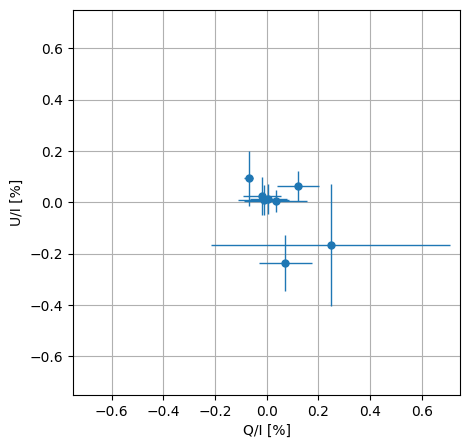

In [29]:
plt.figure(figsize=(5, 5))
plt.grid()
plt.xlim([-0.75, 0.75])
plt.ylim([-0.75, 0.75])
plt.xlabel('Q/I [%]')
plt.ylabel('U/I [%]')
plt.errorbar(tbl_fltr['q_ave']*100, tbl_fltr['u_ave']*100, xerr=tbl_fltr['q_obserr']*100, yerr=tbl_fltr['u_obserr']*100, 
             marker='o', markersize=5, linewidth=1, linestyle='none')

In [30]:
print('(q, u)= ({:.3f}, {:.3f})'.format(np.mean(tbl_fltr['q_ave'])*100, np.mean(tbl_fltr['u_ave'])*100))

(q, u)= (0.048, -0.025)


In [31]:
print('(q_std, u_std)= ({:.3f}, {:.3f})'.format(np.std(tbl_fltr['q_ave'])*100, np.std(tbl_fltr['u_ave'])*100))

(q_std, u_std)= (0.093, 0.107)


In [32]:
tbl_fltr["date", "q_ave", "u_ave", "q_obserr", "u_obserr", "q_n", "u_n"].pprint()

  date       q_ave          u_ave         q_obserr      u_obserr   q_n u_n
-------- -------------- -------------- ------------- ------------- --- ---
20230116   6.468101e-05 0.000116494266  0.0007148374 0.00057527795 3.0 3.0
20230130   0.0012107432  0.00063494535  0.0008089823  0.0005897298 6.0 6.0
20230204  -0.0006921125  0.00093248073 0.00016920493  0.0010722213 3.0 3.0
20230224   0.0024831872  -0.0016636275   0.004633433  0.0023741922 3.0 3.0
20230228  -0.0001745284  0.00023082139  0.0007483376 0.00074243033 3.0 3.0
20230402 -0.00010936788   7.907909e-05  0.0009818072  0.0005921991 5.0 5.0
20230421  0.00072024006  -0.0023615588  0.0010195017  0.0010790124 5.0 5.0
20231002   0.0003458444  5.4380904e-05  0.0012256318 0.00043438812 3.0 3.0


In [33]:
# date: observational date.
# q_ave, u_ave: averaged values of measured q and u. (unit = ratio.)
# q_obserr, u_obserr: observational error of q and u. (unit = ratio.)
# q_n, u_n: number of observed HWP sequences of polarimetry.